In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# import seaborn as sns
import h5py

from spikelib.utils import datasets_to_array
# sns.set(style="ticks")


In [2]:
intensies = [32, 64, 128, 255]
fdataset = '../Planillas/MR-0181_intensity{}_.csv'

all_intensities = pd.DataFrame({})

for intensity in intensies:
    df = pd.read_csv(fdataset.format(intensity))
    df['intensity'] = intensity
    all_intensities = pd.concat([all_intensities, df], axis=0)
validd_intensities = all_intensities.dropna()


In [42]:
validd_intensities['RF_STAtype'].unique()

array(['OFF', 'ON'], dtype=object)

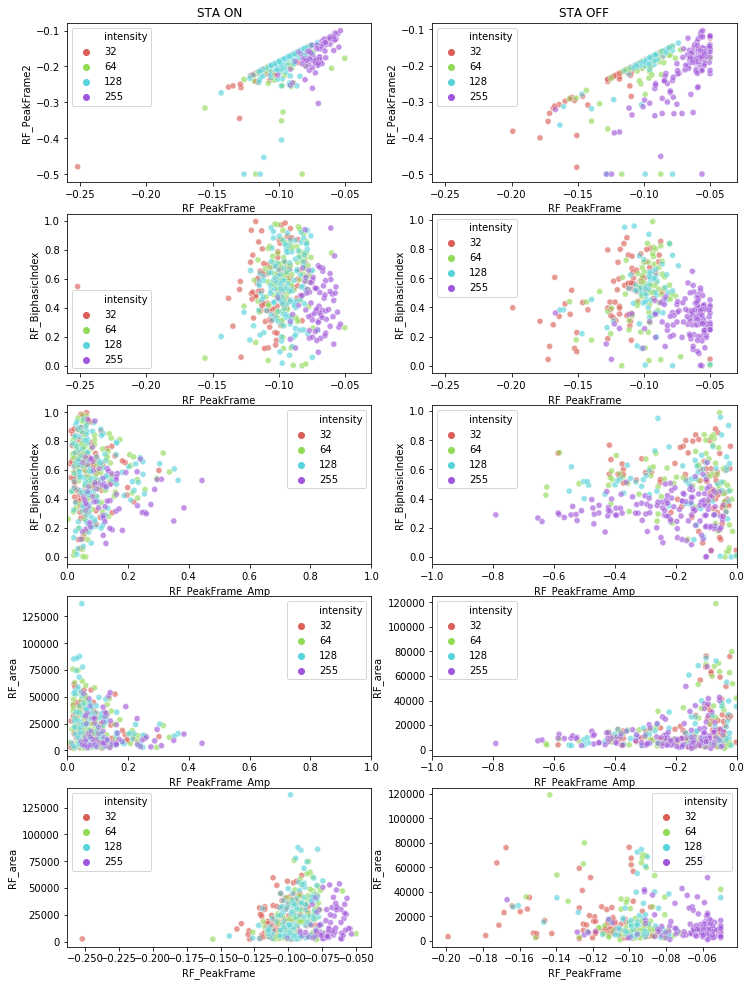

In [84]:
f, axes = plt.subplots(5,2,figsize=(12, 17),sharey=False)
filter_on = validd_intensities['RF_STAtype']=='ON'
filter_off = validd_intensities['RF_STAtype']=='OFF'

cmap = sns.color_palette("hls",4)
sns.scatterplot(x='RF_PeakFrame', y='RF_PeakFrame2', hue='intensity',
                data=validd_intensities[filter_on],facecolors=None, alpha=0.4, sizes=(10, 500),palette=cmap,
               ax=axes[0,0])
sns.scatterplot(x='RF_PeakFrame', y='RF_BiphasicIndex', hue='intensity',
                data=validd_intensities[filter_on],facecolors=None, alpha=0.4, sizes=(10, 500),palette=cmap,
               ax=axes[1,0])

sns.scatterplot(x='RF_PeakFrame_Amp', y='RF_BiphasicIndex', hue='intensity',
                data=validd_intensities[filter_on],facecolors=None, alpha=0.4, sizes=(10, 500),palette=cmap,
               ax=axes[2,0])

sns.scatterplot(x='RF_PeakFrame_Amp', y='RF_area', hue='intensity',
                data=validd_intensities[filter_on],facecolors=None, alpha=0.4, sizes=(10, 500),palette=cmap,
               ax=axes[3,0])

sns.scatterplot(x='RF_PeakFrame', y='RF_area', hue='intensity',
                data=validd_intensities[filter_on],facecolors=None, alpha=0.4, sizes=(10, 500),palette=cmap,
               ax=axes[4,0])

sns.scatterplot(x='RF_PeakFrame', y='RF_PeakFrame2', hue='intensity',
                data=validd_intensities[filter_off],facecolors=None, alpha=0.4, sizes=(10, 500),palette=cmap,
               ax=axes[0,1])

sns.scatterplot(x='RF_PeakFrame', y='RF_BiphasicIndex', hue='intensity',
                data=validd_intensities[filter_off],facecolors=None, alpha=0.4, sizes=(10, 500),palette=cmap,
               ax=axes[1,1])

sns.scatterplot(x='RF_PeakFrame_Amp', y='RF_BiphasicIndex', hue='intensity',
                data=validd_intensities[filter_off],facecolors=None, alpha=0.4, sizes=(10, 500),palette=cmap,
               ax=axes[2,1])

sns.scatterplot(x='RF_PeakFrame_Amp', y='RF_area', hue='intensity',
                data=validd_intensities[filter_off],facecolors=None, alpha=0.4, sizes=(10, 500),palette=cmap,
               ax=axes[3,1])
sns.scatterplot(x='RF_PeakFrame', y='RF_area', hue='intensity',
                data=validd_intensities[filter_off],facecolors=None, alpha=0.4, sizes=(10, 500),palette=cmap,
               ax=axes[4,1])

axes[0,0].set(xlim=[-0.26,-0.03], title='STA ON')
axes[0,1].set(xlim=[-0.26,-0.03], title='STA OFF')
axes[1,0].set(xlim=[-0.26,-0.03])
axes[1,1].set(xlim=[-0.26,-0.03])
axes[2,0].set(xlim=[0,1])
axes[2,1].set(xlim=[-1,0])
axes[3,0].set(xlim=[0,1])
axes[3,1].set(xlim=[-1,0])
f.savefig('../STA/features/ON_OFF_char.png')

In [29]:
fanalysis = '../data/MR-0092t2_analysis_of_protocols_150um_merge.hdf5'
intensities = ['nd2-255', 'nd3-255', 'nd4-255', 'nd5-255']
spatial_char_group = '/sta/{}/spatial/char/'

rf_df = pd.DataFrame([])
with h5py.File(fanalysis) as panalysis:
    
    for intensity in intensities:
        col_name = panalysis[spatial_char_group.format(intensity)].attrs['col_name']
        arr = datasets_to_array(panalysis[spatial_char_group.format(intensity)])
        rf_char = pd.DataFrame(arr[0], columns=col_name.split(','), index=arr[1])
        rf_char['intensity'] = intensity
        rf_df = pd.concat([rf_df, rf_char])

In [46]:
not_valod = ['temp_{}'.format(k) for k in np.loadtxt('../data/list_remove.txt', dtype=int)]
filter_invalid = rf_df.index.isin(not_valod)
rf_valid = rf_df[~filter_invalid]

<IPython.core.display.Javascript object>


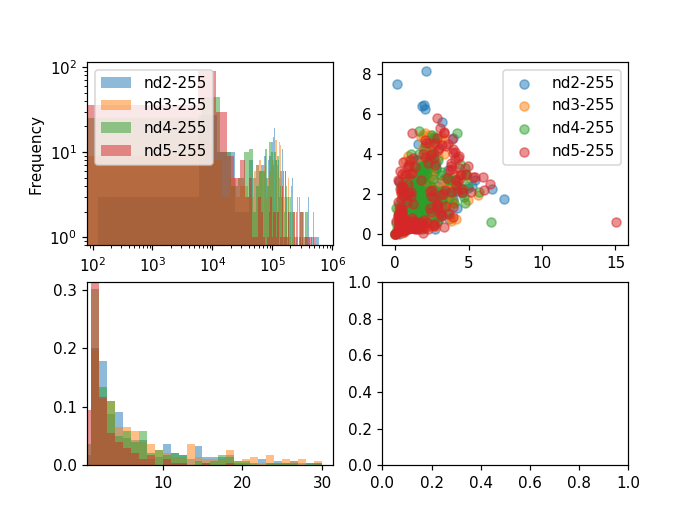

In [53]:
fig, ax = plt.subplots(2,2)
ax=ax.flatten()
for (kintensity, kdf) in rf_valid.groupby('intensity'):
    area = (kdf['semia']*kdf['semib']*50**2*4*np.pi)
    area.plot(kind='hist', bins=100, ax=ax[0], alpha=0.5, loglog=True, label=kintensity)
    ax[1].scatter(kdf['semia'], kdf['semib'], label=kintensity, alpha=0.5)
    ax[2].hist(kdf['snr'], bins=100, range=(0,100), density=True, alpha=0.5)
ax[0].legend()
ax[1].legend()

,angle,semia,semib,x0,y0,snr,frame_max,intensity
temp_0,1.052723e+02,0.477545,0.978620,6.789865,29.993609,1.762544,26.0,nd2-255
temp_1,1.747547e+02,2.463662,0.939691,5.466385,30.000000,26.854100,24.0,nd2-255
temp_10,2.932449e+01,2.102933,3.420149,16.283226,29.931673,4.182574,23.0,nd2-255
temp_100,9.132318e+01,2.402475,1.770451,26.250911,0.694362,10.222365,25.0,nd2-255
temp_101,9.431703e+01,3.000831,1.798669,7.983569,7.470415,2.701676,23.0,nd2-255
temp_103,1.014291e+02,3.544499,2.006849,7.082225,20.243413,2.063418,25.0,nd2-255
temp_110,9.136058e+01,4.259041,2.374769,10.169335,29.381024,4.727628,25.0,nd2-255
temp_111,7.679946e+01,4.532312,2.045968,11.545851,29.970934,6.988940,24.0,nd2-255
temp_113,4.648326e+01,1.250566,2.479113,18.594309,21.718253,2.432771,22.0,nd2-255
temp_114,7.369340e+01,3.934175,2.136687,20.971399,18.066346,7.398511,25.0,nd2-255
